Found 150 Pokémon categories:
['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise']

Showing 5 images from 'Seaking'


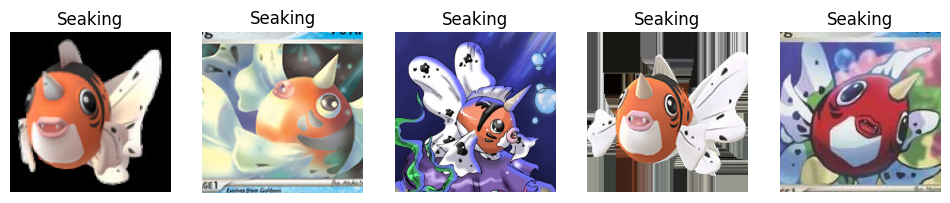

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path to the image dataset

path = "PokemonData"

# List all Pokémon folders
pokemon_folders = os.listdir(path)
print(f"Found {len(pokemon_folders)} Pokémon categories:")
print(pokemon_folders[:10])  # show first 10 folder names

# Pick one Pokémon folder at random
pokemon = random.choice(pokemon_folders)
pokemon_path = os.path.join(path, pokemon)

# Get up to 5 image filenames
images = [f for f in os.listdir(pokemon_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:5]

print(f"\nShowing {len(images)} images from '{pokemon}'")

# Display images
plt.figure(figsize=(12, 4))
for i, img_name in enumerate(images):
    img_path = os.path.join(pokemon_path, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(pokemon)
plt.show()



Showing 5 images from 'Staryu'


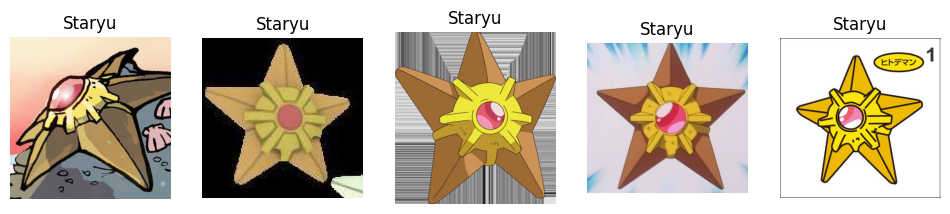

In [2]:
# Pick one Pokémon folder at random
pokemon = random.choice(pokemon_folders)
pokemon_path = os.path.join(path, pokemon)

# Get up to 5 image filenames
images = [f for f in os.listdir(pokemon_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:5]

print(f"\nShowing {len(images)} images from '{pokemon}'")
# Display images
plt.figure(figsize=(12, 4))
for i, img_name in enumerate(images):
    img_path = os.path.join(pokemon_path, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(pokemon)
plt.show()

In [1]:
import tensorflow as tf
from keras import layers, models
from keras_preprocessing.image import ImageDataGenerator
import os

# Path to your dataset
data_path = "PokemonData"

# Load dataset and preprocess
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"
)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(train_data.class_indices), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train (use small epochs to keep it quick)
model.fit(train_data, validation_data=val_data, epochs=3)

# Save label map for later
labels = list(train_data.class_indices.keys())


Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.
Epoch 1/3


c:\Users\Nick\Code\CSC665\pokemon_project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Nick\Code\CSC665\pokemon_project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.0314 - loss: 4.7748 - val_accuracy: 0.1024 - val_loss: 4.1800
Epoch 2/3
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.2040 - loss: 3.4446 - val_accuracy: 0.2047 - val_loss: 3.4253
Epoch 3/3
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.4963 - loss: 2.0142 - val_accuracy: 0.3231 - val_loss: 2.9155


In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras import Input

# Load MobileNetV2 pretrained on ImageNet, exclude top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # Freeze pretrained layers

# Add custom classification head
inputs = Input(shape=(128,128,3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(len(labels), activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 150)            │        19,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,441,302 (9.31 MB)

 Trainable params: 183,318 (716.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [3]:
# Train the MobileNetV2 model
history = model.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.1615 - loss: 4.1047 - val_accuracy: 0.4362 - val_loss: 2.6194
Epoch 2/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.6271 - loss: 1.6372 - val_accuracy: 0.6081 - val_loss: 1.6780
Epoch 3/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8173 - loss: 0.8025 - val_accuracy: 0.6524 - val_loss: 1.4428
Epoch 4/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.9078 - loss: 0.4474 - val_accuracy: 0.6700 - val_loss: 1.3278
Epoch 5/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.9584 - loss: 0.2492 - val_accuracy: 0.6738 - val_loss: 1.3114


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

uploaded = "PokemonData/Articuno/1c60e6f03c4448209a8288878a4e1d67.jpg"
img_path = list(uploaded.keys())[0]

# Load and preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
predicted_label = labels[predicted_index]
confidence = predictions[0][predicted_index] * 100

# Show image + prediction
plt.imshow(plt.imread(img_path))
plt.axis("off")
plt.title(f"Predicted: {predicted_label} ({confidence:.1f}% confidence)")
plt.show()


NameError: name 'files' is not defined

In [3]:
%pip install -U keras keras-preprocessing


Note: you may need to restart the kernel to use updated packages.
